In [1]:
using Flux
using Statistics

In [2]:
make_grid(nx, ny) = vcat(repeat(Base.OneTo(nx), outer=(ny,1))', repeat(Base.OneTo(ny), inner=nx)')

make_grid (generic function with 1 method)

In [3]:
normalize(arr) =  2*(arr .- 1)./(arr[:,end] .- 1) .- 1

normalize (generic function with 1 method)

In [4]:
siren_uniform(fan_in, fan_out) = sqrt(6.0/fan_in)*(2.0*rand(fan_out, fan_in) .- 1.0)

siren_uniform (generic function with 1 method)

In [5]:
function DenseLayer(in::Integer, out::Integer, σ = identity, ω₀=1.0)
    return Dense(ω₀.*siren_uniform(in, out), zeros(out), σ)
end

DenseLayer (generic function with 3 methods)

In [29]:
network = Chain(DenseLayer(2,128,sin,30.0),DenseLayer(128,128,sin),DenseLayer(128,128,sin),DenseLayer(128,128,sin),DenseLayer(128,3,σ))

Chain(
  Dense(2, 128, sin),                   # 384 parameters
  Dense(128, 128, sin),                 # 16_512 parameters
  Dense(128, 128, sin),                 # 16_512 parameters
  Dense(128, 128, sin),                 # 16_512 parameters
  Dense(128, 3, σ),                     # 387 parameters
)                   # Total: 10 arrays, 50_307 parameters, 393.648 KiB.

In [30]:
loss(x,y) = mean(abs2, network(x) .- y)

loss (generic function with 1 method)

In [31]:
network_params = params(network);

In [32]:
using TestImages
using ImageShow

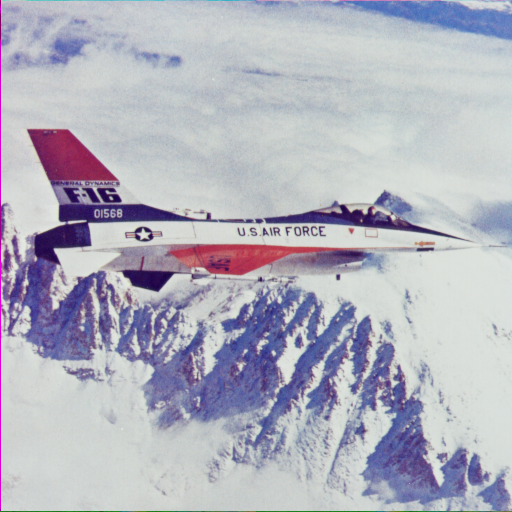

In [33]:
pic = testimage("airplane")

In [34]:
using StatsBase

In [35]:
function sample_points(points, colors, ns)
    inds = sample(1:size(points)[2], ns, replace=false)'
    sampled_points = vcat(points[1:1,:][inds], points[2:2,:][inds])
    sampled_colors = vcat(colors[1:1,:][inds], colors[2:2,:][inds], colors[3:3,:][inds])
    return sampled_points, sampled_colors
end

sample_points (generic function with 1 method)

In [36]:
using Images

In [37]:
image_colors = Float64.(channelview(pic))
nc, nx, ny = size(image_colors)

(3, 512, 512)

In [38]:
image_points = normalize(make_grid(nx, ny))

2×262144 Matrix{Float64}:
 -1.0  -0.996086  -0.992172  -0.988258  …  0.988258  0.992172  0.996086  1.0
 -1.0  -1.0       -1.0       -1.0          1.0       1.0       1.0       1.0

In [39]:
image_colors = reshape(image_colors, (nc, nx*ny))

3×262144 Matrix{Float64}:
 0.709804  0.552941  0.552941  0.552941  …  0.619608  0.654902  0.419608
 0.0       0.0       0.0       0.0          0.564706  0.643137  0.458824
 0.384314  0.423529  0.423529  0.447059     0.658824  0.721569  0.211765

In [40]:
using Plots

In [41]:
losses = zeros(100000)
for i=1:100000
    sampled_points, sampled_colors = sample_points(image_points, image_colors, 1024)
    losses[i] = loss(sampled_points, sampled_colors)
    println(losses[i])
    Flux.train!(loss, network_params, [(sampled_points, sampled_colors)], ADAM())
end

0.11605931512441459
0.11443944095721031
0.10152625597918535
0.09978216844607816
0.09422082366429226
0.08756930400290212
0.08185401407362891
0.08153448444320302
0.0757760538572002
0.07448676934783942
0.07553525312649595
0.0681005571551801
0.06632735388069996
0.06643508396118036
0.06683235719638925
0.06159273387802707
0.06189206547806007
0.05894164790001657
0.05537564078675916
0.053335141974850946
0.053789475135260105
0.04957717853576848
0.051265537616248025
0.04486946393685534
0.046460502879463815
0.043215829078493286
0.041229149331572665
0.04092003249270829
0.03949100823184681
0.03508505391429253
0.033587523734451015
0.03379054201839186
0.03130183683587689
0.03089285672471138
0.029886761922703065
0.03040839723956867
0.026875912969273625
0.025791897055462986
0.02577768393441694
0.025379946288173864
0.02512743622648214
0.024169213786890274
0.021942521432060862
0.021866052935235414
0.022274036157119436
0.023222083724892807
0.02269401258926702
0.021735142399976995
0.021333199932831327
0.02

0.004629705683204188
0.003914719079534214
0.00470892594685015
0.004771831432245812
0.004760319985480911
0.004077884883456058
0.004017765780824777
0.004725939674469745
0.00391447452108737
0.004394463694978568
0.004015714031013616
0.004110431528542789
0.0037931718493521235
0.004122488172234076
0.003877297582019779
0.004734685436598392
0.0047453460928816695
0.004079688101608742
0.0038827009547860807
0.004015162811488711
0.004916027178474441
0.004358794137195388
0.003862788425158116
0.003843910426464009
0.0038742763416745895
0.004006698242880449
0.0038904228105152475
0.003996122447455128
0.0037346288852823564
0.0036207508610207623
0.003690741520074169
0.00415906346268082
0.003999922212559571
0.0038330094088432944
0.004632072347278857
0.004126220974735161
0.0037589024796918814
0.004203966094918958
0.004016125040522446
0.004376634427488773
0.004280941650953246
0.0034789036510427455
0.004566531538933121
0.0036450003413661704
0.003922046220605394
0.0032653470747011706
0.00375396655761324
0.004

0.002756795531494481
0.0026848519691054194
0.0028645956568154143
0.0034420988090636934
0.003585892940099552
0.003768526378180702
0.002590599456656206
0.002810061778434779
0.003945594334007373
0.003056463889387743
0.0026906398800979406
0.002917833723504568
0.0032254516960868833
0.002441388435280743
0.0027287234968668083
0.0028562799676256465
0.002975835195863682
0.003605794632164498
0.0028359711555840795
0.0030949243096724446
0.0027587534085341922
0.0032489801125920783
0.003043591205387135
0.0031599793723514386
0.0025444457485483715
0.0025034542767897613
0.0033802039421784815
0.0030608851925378634
0.0026062063346122284
0.002734362640018764
0.0032837728552309636
0.0032912582365495382
0.0031865399144198163
0.0026234793734420427
0.0030479106940973443
0.003204730134477193
0.0030594429089436832
0.0030406457691128466
0.003038213621449556
0.0026823639160138365
0.0027925000874043635
0.0023216014054847807
0.0033614380103278558
0.0028413324682617573
0.0032482875542564856
0.0032115092669629396
0.0

0.0027947399892511494
0.0023078708896429596
0.0028002078689089113
0.002608300734069212
0.002586279861207673
0.0027004415217968323
0.002743339757315342
0.002475337745054469
0.0024820484135198674
0.0022285674660961607
0.0026140465879852894
0.002441898297532806
0.002699548638460978
0.0028170858172397403
0.002915514303943198
0.0024704783613969643
0.0029409312096591715
0.0023248132709625005
0.0030643659290027964
0.0026855646270844274
0.0026587054132923165
0.0024079051387113823
0.002589054557920932
0.0027987024475214736
0.0027376876011592673
0.0024314697760839587
0.0023939249233393156
0.0025586832085659665
0.0024774048418133967
0.002653892209450314
0.002553969581351706
0.0028561199196386277
0.003204773161006992
0.0023764107640893693
0.0028273287617614114
0.002760467109667952
0.0028801205012177595
0.0024727216435777894
0.0024385148326802066
0.002730737158833693
0.0026479798328256396
0.002355012282844978
0.002349288341664496
0.002150473536214412
0.002744765510582854
0.0025610584895930655
0.002

0.0020093348366274967
0.002993305757588278
0.0021248642621996853
0.0020097972983506005
0.0024554028823684463
0.0023729620234588435
0.002220638241636296
0.002336311899209606
0.002086569499706147
0.0021693898443932553
0.0024600004838193855
0.0023964339193378163
0.0020356671757466803
0.0018287884592639112
0.002082872929454561
0.0022870864689663113
0.00201372517030306
0.001941449588973099
0.0026045559297515016
0.0026005637401721794
0.001968412709715497
0.002574966927106873
0.002304557846570348
0.0026295042857754115
0.0022534489680033766
0.00261300153443656
0.0025175973368382087
0.0021570821136181833
0.0022607433788718466
0.0026893275192167963
0.002479254763533741
0.0021579901090145004
0.0022175984478825816
0.002093392315456613
0.002396218005385221
0.0024897213788547356
0.002607202922858509
0.0022057393151545942
0.0020363969870553795
0.0025254675067057334
0.0020441480707734925
0.0023285367531032768
0.001928229702079495
0.0023629593353539373
0.002230586846198071
0.002578127040559794
0.002480

0.0023956809778401572
0.0021130296671146753
0.0018999552819136325
0.0017791007786805049
0.002281056851352244
0.0022010854319241915
0.001976639020620094
0.002052498864154384
0.0019433196763913084
0.00204229532268829
0.0020029170142236655
0.0019783039880786344
0.00209685945340355
0.0019798115513138524
0.0020244292321455076
0.0020403670456815167
0.0020951696452240864
0.0023577103715875397
0.0021780431077321944
0.002239862739551979
0.0020601106781364393
0.0026130803876012972
0.00192415823073958
0.0018356200212059956
0.002180713800425283
0.0023112579156897204
0.001992196665607976
0.002260974970961346
0.001768804090089166
0.0022681506550924478
0.0020014832329368574
0.002079628709516871
0.002466258726086018
0.0022529962087382495
0.0029502073120894097
0.0024832368872861137
0.002033224507810737
0.0020151046940552354
0.0020560278113356295
0.0019488068868218442
0.0021184977399341938
0.0021696957456212086
0.0021376925461005667
0.0024921309067896078
0.002009334889713146
0.002262274946141977
0.00246

0.0018905971964428188
0.0018361787058914659
0.0017002245010207476
0.0019746211685807446
0.00216042434008378
0.0021202810934974627
0.0017754543939187638
0.0019147698144320647
0.0017800905753975714
0.0018077611043293659
0.0018353668389708858
0.0020311000615920193
0.0019156229168003716
0.0019564840715640707
0.0017519536364185874
0.0018741273897907272
0.0019019585785430132
0.001561432079585383
0.001528715534063331
0.0020882742168759454
0.001834948278061897
0.0019223555832675284
0.0021129042257640833
0.0017639162005593071
0.0019190630706933394
0.0020504796753409104
0.002067609685670713
0.0019100652719886493
0.001725661263354871
0.001657097171066915
0.0017714838256763386
0.0019031656728190265
0.0021432051446744617
0.0017308163642371591
0.0018738880832486371
0.0022575684875230707
0.002328737950218172
0.0019403513839164582
0.0017516257628717154
0.0018018145744912956
0.0021106049479619336
0.00204544455732669
0.0019466181254127045
0.0016382252118870382
0.0017757322470353422
0.0020515809577451058

0.0015763065864290574
0.0016063365946592078
0.0017705992908115325
0.0020720324957084744
0.0016921348445352185
0.0018079873247869762
0.0017457155164107997
0.001901281276989127
0.002183186305333419
0.0018762236710544455
0.0016109631922684926
0.0016122267548190784
0.0018293296990501428
0.0017438032027493877
0.001608917289749311
0.0017073388130621932
0.0014870907853451732
0.0018859181379298235
0.0016825953330310364
0.0018268201933406834
0.001818300096595844
0.0017637267203840384
0.0018572442309664958
0.001740116516035866
0.0018816430798617653
0.0017335364770367713
0.001734994800139197
0.0018747612587478857
0.001956254876547358
0.0019097338936310212
0.0017787899525419598
0.0017680543269091061
0.0020981418015929305
0.0017522610018148351
0.0019418077238316398
0.0017429468909887804
0.001699778496688237
0.0016623845586260539
0.0019396916683073657
0.002264149577821013
0.0017703986855732653
0.0019048168487835653
0.001648281782475102
0.00220351618537386
0.0017749451989402716
0.0016617436077841314


0.0014636978423198917
0.0020344051751163016
0.0016593856507546752
0.0018977624415458675
0.0017408880434996307
0.0015948670874436968
0.0016910636676872586
0.0016952524992791906
0.0017017968592166245
0.0019562796900714605
0.001866463591492943
0.0016684433433447785
0.0017527943177615924
0.0014498512058014523
0.002214002067816624
0.001426033207203252
0.0016542646609467601
0.0017023985284768245
0.001691633676835503
0.0015121090432750441
0.002107176219227473
0.0016085506668735404
0.001601844106286811
0.0015434233525035285
0.001709611354304793
0.0017453916192339478
0.0015885779600143801
0.0017952659074842315
0.0015185597594957014
0.0017135427345336466
0.0016525947253860727
0.0017167168197067663
0.0017344974800585996
0.0018716454797384583
0.001916737380649524
0.001646449688034007
0.0015775346594515995
0.001963234513459951
0.0018081492547718763
0.0017289442050889066
0.0015259674777514285
0.0020284200840014195
0.0015142505538094082
0.0015442974084875292
0.00216764580318164
0.0018780233942677482


0.00169582617600299
0.001589397982881773
0.0014057513940246267
0.001620653052587348
0.0015529085356656026
0.0017452742832266728
0.0018633187445965427
0.001772568963145293
0.0017346471439234768
0.0015749650980878603
0.001504453413342352
0.0017135600981833547
0.0015699393022666007
0.0017105999223846619
0.0018131443847887974
0.001555545043876962
0.0014621694159928985
0.0013363226714605363
0.0016378599010554466
0.0017260626240903736
0.0016499095260561457
0.0014644563372194757
0.0016321218054490734
0.00172038420813581
0.0015131369197364426
0.0015374242220871706
0.0016557640814340829
0.0018440320853495061
0.0018824010193226666
0.0017798964917993768
0.001548792249761416
0.0015325798143093889
0.0017235547236973713
0.002137269839425518
0.0015228572824635479
0.0015683181280785913
0.001624918582788466
0.0013353917630954863
0.0018864487854810452
0.0014375613446929152
0.0018676605956939388
0.0013556356862207896
0.001385649862444405
0.0016659822532316543
0.0015266396545218662
0.0015976089302314263
0

0.001561581069930171
0.0016597161971204702
0.0013720578142788755
0.0014740174403925904
0.0016225892560287598
0.001380688861347199
0.0014560290521740142
0.0016044732422237993
0.001513935923254994
0.0018106578431632714
0.0017754821630791365
0.0013994249167964493
0.0015265413623893366
0.0013931698020370076
0.001417160903131821
0.0014020472243995205
0.0018183855289522904
0.0018768126354644099
0.0014707989026483206
0.0016850478585405907
0.0014601650290510864
0.0016923068181040194
0.0015682391056748238
0.001317447480520348
0.0014343610408630962
0.001510807846458858
0.0017629550527710307
0.0018116124420084793
0.0016461475573936798
0.0017123390740620614
0.0014977054620931506
0.0015747714113186085
0.0015946302769412745
0.0016765268477635226
0.001576902858989828
0.0015386034253699783
0.0016538092503353826
0.0016394264823733275
0.0014286006784911594
0.0017712669953220937
0.0017226349572373085
0.001430365941650773
0.0013285345471183109
0.0018901421961264719
0.0016233409463407306
0.0014119551642264

0.001588020473006592
0.0014998430167371378
0.0016983058799693266
0.0013701106263732884
0.0015118779017156009
0.0012312320516074074
0.0014198839609409176
0.0014775105359248325
0.0013649215831409284
0.001410032191184356
0.001331676609216054
0.0016576225072813353
0.0015353688912487621
0.0016263642806945576
0.0015142711356518387
0.0016240895376422838
0.0012362613111861897
0.0015227165349028782
0.0014322225634231997
0.0015181460437157272
0.0013255833688921765
0.0013789852091290206
0.0015157077486493969
0.0017235053087079674
0.0014830999617031274
0.001641288807673157
0.001709373367644559
0.0012070102816486197
0.0013637239082020163
0.0013259834391074518
0.001712859265305831
0.0014706470351345498
0.001486507040865303
0.001325522386350043
0.0013547995875428942
0.0015257292102062005
0.0016357470391795907
0.0012961857973863265
0.0016076527976003555
0.0016097959414472878
0.0017660053762880797
0.0014396363222290971
0.0014328213995423607
0.001621389959177381
0.001457605950086518
0.001413965614008650

0.0014188923325131701
0.0015196461939175811
0.0012536351751950114
0.0013809589824746924
0.0015213266129925941
0.0015527281308389542
0.001313472097933522
0.001414610273033529
0.0013768545344831108
0.0016775059267851757
0.0016629476047053482
0.0015360157963397022
0.001271006910075998
0.0014166276471144288
0.0015089266040092166
0.0013315988269697494
0.0014545656270407957
0.001671118199738342
0.001410022603856134
0.001422108754253999
0.0013232554917212962
0.0017551417920782409
0.0011577006972451015
0.0014772363580933055
0.0013302843402637971
0.001429759901437092
0.0013945680986366255
0.0014529843981270166
0.001729321073479501
0.0015556373836720858
0.0013005652611549913
0.0014280476658014862
0.001635409345710565
0.0013681038642553572
0.0013666465957931147
0.0013618342775843309
0.001263535999565319
0.0013804335179070464
0.0013417273564998089
0.0015075133343126195
0.00125246295405979
0.0011895039934037576
0.0011617558554421264
0.0015649391916399476
0.0016571261250579398
0.0015874212206740108


0.0016611304554967994
0.0013989674855662876
0.0015110954053330938
0.001248953459189269
0.0015809558175435038
0.0014507098920741011
0.0014533692327262041
0.0013684384858707755
0.0012722445473572965
0.0012935763011529702
0.0015696717909240501
0.0012712630496391313
0.0015308916560326906
0.0014415659771885427
0.0012371362316337309
0.0012343040643552458
0.0013986822112419157
0.001537749782951148
0.0013670277994584183
0.001221455024315497
0.0015931275245107887
0.0015058844113515699
0.0012323134597925405
0.0011229222274788857
0.0014604474551177908
0.0012265006302300627
0.0012117211155123315
0.0016653591756637047
0.0015362485752892896
0.0013856041853570374
0.0013557987455351552
0.0013971496346596344
0.0013913124143124947
0.0012053388878083642
0.0014304139694641682
0.0013401351586966852
0.001571676246880302
0.0013012680706297058
0.0014517601993870016
0.001586127648553879
0.0015353971103884078
0.0015137872431758108
0.001339213935307357
0.00165960844222554
0.0013710936389915082
0.0015213130528418

0.0014454686637648026
0.0012915532603854118
0.0013491779025319294
0.0010949272539328826
0.0012296427581169388
0.0012273817416725724
0.001292514590033713
0.0012232598209750468
0.0012918839898107138
0.001510214772308222
0.0014090391027143682
0.0012304341066602731
0.0016386606568378227
0.001249582880535478
0.0012827289673311827
0.0013733991371304918
0.001493636406245731
0.0013562683443361914
0.0013689684624307447
0.0013998780391565214
0.0011807183277550556
0.0014721988984661202
0.0012115417861552737
0.0011750019236183556
0.0013580351874546452
0.001540873818420513
0.0013736766966022183
0.001501226574617447
0.0015126665146681102
0.0013658581032438425
0.0013103214670776911
0.0012627698014482283
0.0015216358008305385
0.0012368292843554594
0.001133661009904867
0.0016212323382531443
0.0013185894189882972
0.0013345577829924039
0.0013448405688996582
0.001631279438700071
0.0014425422240970018
0.0014198341561785111
0.0012245536604508047
0.0015831177493976928
0.0014385487891667417
0.0013433127716305

0.0014980745960182734
0.0014138227909087312
0.001394773429556926
0.0014915186381021163
0.0011348202741452828
0.001202751829040384
0.0014144296675817087
0.0012321323984994643
0.0012592593990548165
0.001323020353792336
0.0011169321991168892
0.001421190617114677
0.0011954225366195492
0.0012223968816318146
0.001390341893904353
0.001494457080060041
0.0011303093429182076
0.001255460425038937
0.0012909695930756408
0.001394747345181309
0.0014184688995930123
0.0012907464480891593
0.0014434600643059784
0.0015962523121511064
0.0012299381644636162
0.0013769899025007457
0.0012450454110954571
0.0013692514402432188
0.0014643812995842147
0.0013489570853355923
0.0013920601977332643
0.0012576841623861724
0.001142416802781553
0.00133372437087771
0.0013568053219166567
0.0014746210302826147
0.0014221324494152693
0.0013709834556911195
0.0013293106832717716
0.0014699018078631106
0.001104816026902174
0.0013135477137031263
0.0014038046954710295
0.0012962004748454784
0.0010831880067403105
0.0012544421127289667


0.0012528060138158612
0.0015175210477616653
0.0011378978646983623
0.0012441552495274224
0.001311744968584361
0.0012615148642066561
0.001159799863481391
0.0012537963398103332
0.001148521640256696
0.0012348429446387876
0.0014243134425484009
0.0012651369694607663
0.0010615647796676886
0.001085647788995841
0.0012041284264922181
0.0013106880067401535
0.001117512231036849
0.0010431222140662234
0.0010885237018540047
0.001457777449010983
0.0012264196368487906
0.0013458202065256698
0.0011093584252938654
0.0011737419146204966
0.001306753179279999
0.0012544114369953737
0.0011697151170802654
0.0010607056432424013
0.0011894289403463498
0.0014269351721802066
0.00120687356657199
0.0012260634670439514
0.0012389158838565426
0.001233120725270587
0.0013064179423640445
0.0012143707613430368
0.001159623393386544
0.0012600320320619884
0.0014669005257861342
0.001256842764499209
0.0014946122178050023
0.0011239078457260547
0.0014466699845863227
0.0012999312591440186
0.0014760420819679258
0.0017358713861189336


0.0011952966536943506
0.0010662887633189936
0.0015384513615642696
0.0014208077742275177
0.001305676333548988
0.0013446975293716582
0.0013852233451639203
0.0015343897429589924
0.0013356533878947526
0.0012183098164855084
0.001122561226844178
0.001154804953566932
0.0010979685336128463
0.0011800581565103974
0.0012857198029702732
0.00127940857474146
0.0013985488682200103
0.0011687174048988884
0.0012466639052479515
0.001423141151637659
0.0012854334672102988
0.001288542405372361
0.0012934102914248635
0.0011710945664106188
0.0011010526357682763
0.0011115001527800094
0.0011857449182909403
0.0011253073566744435
0.0009456196867977145
0.0012041740610565501
0.001016797210194734
0.0011957218014279783
0.001358736084496312
0.0011506487390492129
0.0012769416032871522
0.0012982842466081146
0.001290105670257225
0.0013041513925761423
0.0011466506547986185
0.0011622450854338574
0.0012272246010616202
0.0012130997265615278
0.0014209938153773591
0.0011360104159801566
0.0011418135082725041
0.001295726150445973

0.0013625729108419065
0.0011761913284483664
0.0011117508317817061
0.0012537026731784392
0.0011645314975059862
0.0014886054224914423
0.0011138232273965962
0.0011224324124208555
0.0011436361658567192
0.0010950413523213194
0.0011152135483167701
0.001015495798849432
0.0011883660986941535
0.001279793843841441
0.0011619590294825693
0.0011325605723428056
0.0011573713026098264
0.0011628490158172018
0.0010465877456309531
0.0013650669607901244
0.0012581007303567758
0.0011880786448312172
0.0012115201867959964
0.0011164452494928836
0.0011881511808418056
0.0012926811147431657
0.0011867931858205291
0.0013060934108017088
0.001173994506593302
0.0013130681396539498
0.0009925650494333911
0.001193358307208877
0.0011791426742377932
0.0012686227927431843
0.0009433211627872064
0.0010515498258229898
0.001227017921199382
0.0011838939472005483
0.0011607341153520077
0.001309932121856095
0.0013447647080502903
0.0012100141674976621
0.0011836069912156604
0.0015321140555590162
0.0012112013260441802
0.00112584732964

0.001183178933574814
0.0012592865910419342
0.0011340501317115375
0.0013538487236095138
0.0012264261189672944
0.001007248466543327
0.0010483136372072537
0.0011618575177439036
0.00120039629072517
0.001280205977654521
0.0012670250472879825
0.0012710823415558396
0.001295500986733261
0.0011556705476681532
0.0012894642059218444
0.0011921181325101132
0.001039687478846964
0.0011380892869405962
0.0013333541365911168
0.001224947046316843
0.0011541601375141374
0.0015423768727820357
0.0012356476471409104
0.0010951586884000082
0.0012620967706617546
0.0011663576761421917
0.0010776383300637527
0.0010191435785052853
0.0012253326305631874
0.0010958244422551854
0.0011348945492950999
0.0012757385606039177
0.0013025394073240555
0.0010111192864957306
0.001161048850092754
0.0011075261292032375
0.0011129704895302456
0.001014515459295569
0.0010208791512816646
0.0012581182349514816
0.0011939018756490117
0.0014589984443995534
0.0011635715796111722
0.0011868007919327596
0.0013145925414202479
0.001299807655414467

0.0011689479341486883
0.001057388292382456
0.0010224471637298358
0.001115119305819883
0.001136470067412683
0.0011887379622732392
0.0010782233099675
0.0012579254733236787
0.0012186737431839503
0.0012259835118674553
0.0012782886504977484
0.0013622033245334262
0.0011989820589626437
0.0011372959702098796
0.0011296333635528058
0.001166145020729191
0.001375046458663937
0.001239442805688363
0.0011860831824395532
0.0011131770092696616
0.0011646731680927914
0.0010417974010254307
0.0010595039988056348
0.0010513529398642084
0.0011633996925953566
0.0012288807817761335
0.001149787516300279
0.0012017485670961546
0.001103901461553479
0.0012299889753795597
0.0012355545271051395
0.0011347807196110584
0.0012287192497667714
0.0012367273938390284
0.0013304722313533326
0.0010591435719516115
0.0013201591863644115
0.0010877692295832673
0.0011576170119371248
0.0010527766809431294
0.0012159396659167435
0.0011502132094469558
0.001354547964742508
0.0012110849830449927
0.001286284550464378
0.0009700101069032343
0

0.00127228997409668
0.0010015359371264862
0.0009531600159330875
0.0013291291162174205
0.0010062120730418055
0.0011825230373634762
0.0011201805101209697
0.001047143104891324
0.001007447557983917
0.0011084060920499798
0.001153769720577019
0.0012117919603800615
0.0013355496208436735
0.0011863374507820959
0.0011221040109435474
0.0012600045468279316
0.001224880634689625
0.0011370956304367823
0.0010672434296061571
0.0011084471991853974
0.001007508917743593
0.0011104470916338009
0.0010516613994692421
0.001042015113186354
0.0012431802075556072
0.0009720356871007048
0.0011663919231180387
0.0009418511141957844
0.0010711659670575822
0.0011975235793588084
0.001334084545150184
0.0009625364256082811
0.0012623814354334902
0.00116486922037176
0.0011364530185830274
0.0012566643432088754
0.0010398548062123458
0.001095283723274392
0.0011970746889569865
0.0011140097257731738
0.0011781524207052404
0.0009374958606784247
0.001177263033885611
0.0011828380306216951
0.0013442800236450013
0.0009714682544592861
0

0.0010032696800781446
0.0013198183101947192
0.0011732866803352362
0.0011157981841540734
0.0011744829630685241
0.0011746346436033036
0.0010167751806704312
0.0009946726645297338
0.0011950347806475926
0.0010013240210213624
0.0012710706286706691
0.0012197509356487635
0.001001775934463262
0.0009441928325322047
0.001236070599741201
0.001109487787054464
0.0010056167004198506
0.0010168298899012518
0.0013026829264091019
0.001166919138812465
0.0010355049793189068
0.0010507973896280046
0.0010400676070918145
0.0012235944647724303
0.001213639005624827
0.0010735363226033379
0.00109012212735205
0.001177271234135511
0.0011333818118525478
0.0011273129892113234
0.0010346799510309091
0.0010093109038440988
0.0009664979080587005
0.0011616385568877588
0.0013245010538999007
0.0011298853538942825
0.0012986002245029087
0.001158020228434077
0.001185457267193504
0.0012616907938021167
0.0011292566823680515
0.0008998259782148523
0.001348079146609055
0.001135734363023223
0.0011214870840331292
0.0011007701834423141


0.0010152563706794541
0.0010128064109322218
0.0010006052253508492
0.0009662822908485538
0.0011364498707539534
0.00117718329232224
0.0008506875729782749
0.0012322667854332405
0.0011183977848185512
0.0011327597840116515
0.0009959783965255151
0.0010499897940967199
0.0010768590413681453
0.0011177995082128505
0.0011164247196094794
0.0011347465489989664
0.0009756050232687315
0.0012310859666607764
0.0009814709852793717
0.0010782906171385236
0.0011118089297772443
0.0010737863809766799
0.0013550684357316993
0.0011222142282516481
0.001162284557761748
0.0010292148511104725
0.001240489261106886
0.001223929563426738
0.0012636709594872656
0.0009952947763588753
0.001217908765336918
0.0012183174996400995
0.0010675948366988257
0.0009733477849552755
0.0011507794909977164
0.0011092429147954855
0.0011173469545573747
0.0009179683861805854
0.0012526705304022404
0.0012069069116739776
0.0009493751619935788
0.0012122396506700276
0.0010302270326000079
0.0011457433064905676
0.001122581248119798
0.001181056637312

0.0010857393497269135
0.001129655701151106
0.0012064082060838164
0.0010402430867947413
0.0012439836426375854
0.0008702495668930216
0.0010367933153451621
0.0010964537419520502
0.0009786469384873936
0.001196690895426575
0.0009167898448200366
0.0010209269625561874
0.0010952610635192482
0.0009942650464444822
0.0010448877425789465
0.0011982361955054125
0.000999773612233347
0.0009523628740560988
0.0009530107263954734
0.0009770099360483923
0.0010764337612132644
0.0011323595573102078
0.0010347868352269737
0.0009557251026317839
0.001086247952022376
0.0012295501358333667
0.001063549411193739
0.001075237241398857
0.001032518894051393
0.0010703633174493285
0.0009970128867379162
0.0010888165171354669
0.0009891219052580488
0.0010900635188994489
0.0010206502932421848
0.0011292358214034066
0.0010381238222293028
0.001409387353158013
0.0010349321771691538
0.0010533847795225072
0.0011717720651709196
0.0009528490016933255
0.001002721554583921
0.0011018429880866488
0.0011076903874460543
0.00105625351746202

0.0011053083095456352
0.0010205964756748607
0.0011807346912074412
0.0012314255815895066
0.0010465323227488472
0.0011225555803075049
0.0011043665016414934
0.0009216131431189111
0.0012941962261279506
0.0010450131299462612
0.001167459396016996
0.001198828478632005
0.0009605207726478925
0.001080519738950186
0.0008237287592612621
0.0010386135374905478
0.0009502772918239096
0.001036135174708926
0.001167294331360053
0.0010319580309632234
0.00104373062620638
0.0011982762583577034
0.001031711004625479
0.0012147050161404758
0.0009925233222820172
0.0010309808468526938
0.0009634153647025412
0.0013871999355285064
0.0009885368741674146
0.000995746206751305
0.0009766064135501387
0.0011146491221028212
0.0010482706266308796
0.0010476397534281963
0.0010223088755228207
0.0011250804093725084
0.0009439984070625846
0.0009200904475173653
0.0009700857396434505
0.0011669481436556238
0.0009594080797098555
0.001050137517509866
0.0011228483401984444
0.000993968933938773
0.0009191600805660356
0.0009303869945655789

0.001097019385436635
0.0011353525080959623
0.0012301888982463969
0.0010964101824393639
0.001041430803830126
0.001109397580306548
0.0010659414982958232
0.001070071726888992
0.0009339771545566275
0.0011499545828920123
0.001122906082708262
0.0011625773808480024
0.0010112022160790768
0.0012210480195880005
0.0011624600690199034
0.0011324514759797708
0.001052058337115968
0.0009868907613222364
0.0009278380980617024
0.001091327957591084
0.0010812416393574183
0.0010037079704694443
0.001122145804625516
0.000958843238017073
0.0010980328631222766
0.0009835308515329527
0.0011711482676164005
0.0011322427358017187
0.0010905198501711402
0.0008900384033687344
0.001128131272082834
0.000914956546962713
0.0011613475592859774
0.0011635694584963747
0.0010023145701906799
0.001045931587176445
0.0009272113774724901
0.0011867493828630021
0.000981784244877526
0.001002476098645787
0.0009305878124899461
0.001109552886137128
0.0011587676636902473
0.0009448089526326835
0.0008991803990267879
0.0010531830171657968
0.0

0.0012654126015661227
0.0010276805522452307
0.001036331142779514
0.001174195702527708
0.0010789766771746746
0.0008957348568425567
0.0012217457049213587
0.001111811302791061
0.0009305288423290958
0.0013073366038883771
0.000981016216937384
0.0011930315110291383
0.0009348095398984436
0.0010171612644982895
0.001112736310017148
0.0010660708267683442
0.0009515266768432415
0.0010796903691404566
0.0009892118806436756
0.0011242635862633765
0.0010146031779416631
0.0009866457218171247
0.0009494264026176919
0.0009469505040918131
0.0009214904916275732
0.00098853726407458
0.0010441071872880554
0.0010250429415394435
0.0010959988542794267
0.0011358113115640374
0.0012008281797724824
0.0010636770134523342
0.0010909909882656718
0.00104731220501172
0.0009521899112275513
0.0013752758017492957
0.0011042023426148407
0.0010339808776943162
0.0008467878154920648
0.001314026415192505
0.0009759523613186262
0.0010464305731874063
0.0010097270155874402
0.001040871693193118
0.0011687721532478827
0.0010286690034902728

0.0011160340023722041
0.0010784854594493604
0.0009836257203160081
0.0010698631853039546
0.0010093589956680076
0.0010594553848283655
0.001151920508641906
0.0010327713373338883
0.001161641432250713
0.001168434864326741
0.0008688834110857144
0.0010118255456059366
0.0008417964432385445
0.0010304693021100392
0.001137511052952366
0.0009738657231776393
0.0010490276598007404
0.001217495991738127
0.001216382129547231
0.0010145884922881509
0.0010631376396647463
0.0011435519082689163
0.0010789342614653489
0.0010909089891898865
0.0008725357444225377
0.0009743423982411147
0.0010685468546988595
0.0009821923105182459
0.0009025041539699806
0.0010510454988387234
0.0008552691043569779
0.0009234961577437234
0.0009066231514530038
0.0010376947487417264
0.0009919169939964284
0.0010826964487015524
0.0010500982038890165
0.0011307837823134263
0.0010157656734779245
0.0010579611964707167
0.001042136998783106
0.0012104351565115714
0.0010838748319993788
0.0011419733303381654
0.0010097119925735146
0.000999055116850

0.001008844487630777
0.0012426964593347284
0.0009787786364625075
0.000959296531911121
0.001223755967186758
0.0009700478167616496
0.0010128032810987266
0.0011381364856839012
0.0010397401475650185
0.0009578226765143317
0.0009519956181075667
0.001044573866283815
0.0011122107896194297
0.0010053159482881176
0.0010956678684079218
0.000871129350241957
0.000900807953895798
0.0009314126592624298
0.0010627165134765406
0.0008873632711722841
0.0011200764654910919
0.0009946858375043637
0.0008686395704372041
0.001096947282082569
0.001047211219893912
0.0009682505510858856
0.0009048864019180512
0.00104800735173929
0.0008599342590651717
0.0010825742420790955
0.0009188151089460669
0.0010143453528322268
0.0010197126049392355
0.0010707014126510432
0.0009702266681632551
0.0009847041206441373
0.0009366369413613731
0.0011656657647190667
0.0009779284453192774
0.0011339407780454013
0.000931132395751386
0.0011684256014314316
0.001199977867286656
0.0010736120813302503
0.001015227907609489
0.0009696828925732419
0

0.0011362210853704915
0.0009388668917432535
0.0009294212080349391
0.000862070805746862
0.0009894747386597245
0.0010330319551475169
0.0010157056841960885
0.0009417822455448328
0.001156360504518097
0.0009507376952420836
0.000999272362501848
0.0008532289422827731
0.0009139592426933579
0.0011150901245921957
0.0010745858956161495
0.0009709886444277029
0.0009560312084211994
0.0009352171599859065
0.0009438821620527553
0.0010956049156400415
0.0010378836421246138
0.000944504011514068
0.0010668686697212233
0.0009588231346145745
0.000893769608813696
0.0008484933757596204
0.0010721455626002364
0.0009265111600747353
0.0010623948526464738
0.0009330702875379468
0.0011614597090088112
0.0010301943610153295
0.0009486358245258359
0.0010716936477933366
0.0010373584573466546
0.0008991504898609939
0.0010589835819370013
0.000989912479136691
0.0012496449590917748
0.0009447682640707348
0.0009414739583385361
0.0009938377978861623
0.0010836812867144245
0.0009041823102441818
0.001199232901766465
0.001009733586348

0.0008590362018067082
0.0009275434071849591
0.0009579836080065751
0.0010527191315349287
0.0011176935584006067
0.0008580083089849458
0.0010452298969572938
0.0011020813720120373
0.0010975859804206454
0.0010320064383153393
0.0009976731886714408
0.0011179798904010782
0.0009678722235923184
0.0010100158182062085
0.0010810534944301353
0.0008774310723052449
0.0009213639434713606
0.0010141301897005235
0.0008543731535443567
0.001180030646692797
0.0009705337281026893
0.0012404596345452492
0.0009371676880096068
0.001009922732173713
0.0009604575720875101
0.0009999800506403226
0.0009231522754039036
0.0009616872454710877
0.0009428834142349001
0.0011060690026041228
0.0011095714160410002
0.0010209056924590416
0.0010242345340078726
0.0009911313993814094
0.00093507339969495
0.0010350907563387308
0.0009530428978220294
0.001051520238055896
0.0008128053760407833
0.0010261266429225557
0.0009482471694317921
0.000989736072012599
0.0010844292469691919
0.0009811224988175683
0.0009542014218661332
0.00097249040066

0.0009360888528866409
0.001053945767905189
0.0010260895409803664
0.0010500437676917243
0.0009316496000879186
0.0009232025777940678
0.0010538970201106048
0.000968266232775699
0.0009227147899220139
0.0009281288445969076
0.0008655816160073841
0.0008708255461866578
0.0009973691957142908
0.0008048340517261271
0.001075832557057288
0.0010569381778668765
0.0010585554922370709
0.0010491592598045952
0.0008814953301254737
0.0011331361154342421
0.0008622202780732974
0.0008432293426237381
0.0010149695503165925
0.0009693807574958253
0.001077614526873419
0.0010700433106966142
0.0008869958285617935
0.0009545274879853772
0.000985344877957809
0.000949138899433794
0.0010375419385060868
0.001008683732643902
0.0010416634665480877
0.000885044532884645
0.0009839142315185212
0.0011004679884791576
0.0009128882634207355
0.001058425576624207
0.0009038264802596066
0.0009091390758612573
0.001018249884216799
0.0009221431587986096
0.0011476584345429424
0.0011729945463258892
0.001011320668534403
0.0008059836312539159

0.0008729225213029496
0.000819864083775937
0.0013573073672599144
0.0008908135955060466
0.0008900246849657102
0.0010666635838438862
0.0008801290536756421
0.0009956575203670436
0.0009605954154223746
0.0011545072202014002
0.0009661504584719876
0.0011139014133025847
0.0008836361633872596
0.000877431681142678
0.0008480930027409354
0.0009287096990271736
0.001037209087182785
0.000995609012772061
0.00092665716778268
0.001075499590683489
0.0009996481438689522
0.0011465687345739869
0.0010425419198078648
0.0010621017782716155
0.0009122915329495663
0.0010592020855489082
0.001043075495825512
0.000913748160762166
0.0010332638254300407
0.0008840074564592388
0.000935395052357481
0.0009048868536990573
0.0011511168554707383
0.0008934941294852137
0.0010047005424564516
0.0009662193190558621
0.0010225287208044638
0.0009708392565690533
0.0009812048960147416
0.0008581031128772985
0.0007884042712151881
0.0010165086859645785
0.0008823944731400596
0.0008468932561080943
0.0010210433928250233
0.000908803197126414

0.000944434284951651
0.0009804340341321234
0.0010726676340456782
0.0010301937548617207
0.0009750417716812348
0.0010983542668719325
0.0010487342559038898
0.0009612730544270726
0.0011040599870928572
0.0011682469748762365
0.0009842157797564195
0.0010277481162283327
0.0008718043739889891
0.0010239585966168628
0.0008872577782898658
0.0009958490728799402
0.0009690702224555717
0.00100531603114764
0.0009306201278392367
0.0009932399383850714
0.0009105141291672001
0.0008913504343613712
0.0008121374388892797
0.0008514750938776348
0.0008677192885879507
0.0008582915074960714
0.0010821758228158837
0.001024321544167172
0.0008244227824100122
0.0010032394362996888
0.0010863934682755771
0.0008216505610452377
0.0009415952614749526
0.000994427943746725
0.0010253649995064862
0.001081791756216305
0.0008508495081773165
0.0008808461190270111
0.0010361942445361206
0.0009992122885780043
0.0009656865173930689
0.0009790107340923433
0.0009960125557596981
0.0009156473740102234
0.0008859476916211711
0.00092374947750

0.0009476048411107262
0.000880656202494033
0.0011443785718468268
0.0009955849428747606
0.0009203815646131535
0.0009444046981842009
0.0010373811990716257
0.001115450974090321
0.0009149500322262085
0.0008479200251891721
0.0008819720537134996
0.0010014533297755372
0.001044322698144978
0.0008674724987879942
0.0009096488503723505
0.0009441905744410265
0.0010660445037596379
0.0009608389951479445
0.0007877251659377037
0.00109304263013295
0.0008480650867571049
0.0010205192908483872
0.0009916248824184462
0.001075598522784332
0.000999169867189737
0.000909375289504287
0.0011114897688772089
0.0009060515095239411
0.0009117568671581764
0.0010472944604359468
0.0010523289779880293
0.000853572014420244
0.0010439524886092313
0.0010169006620115095
0.0009126728495112507
0.0008924256777901049
0.0010925022485538231
0.0009541845892984726
0.001043780869429409
0.000890858528026387
0.0007623448579578751
0.001017329074402452
0.0010333158790608668
0.000900445167403356
0.0009280045811944048
0.0008468130144405538
0

0.0010030518399369677
0.0009124818486089476
0.0008438028127371139
0.000951243055046257
0.0008898596480395814
0.0009833988787989294
0.0009175689596282845
0.0009529616129441724
0.0009313686177717242
0.0009928945494084179
0.0008207199432345831
0.0010951715381160914
0.0010178963387514795
0.000925069914753784
0.0009604934980704365
0.0011110551032895777
0.0008538142728818631
0.0008812962827504846
0.0011282557505662085
0.000833802701855125
0.000926921912051309
0.000892001547051437
0.0008955628725483173
0.0010487378732094493
0.0009102749537849066
0.0010180979095553763
0.0009435239043399894
0.000992531289910802
0.000991179298875581
0.0008297391988681761
0.0011951932916021589
0.0012957866204627477
0.0009068368946971746
0.00099248633873358
0.0010177428903525027
0.001022072981020036
0.0009404090425892718
0.0010159821700557097
0.0010188911819014072
0.0009731635230172689
0.0009194241038518932
0.0008797234629941528
0.0009635610088185468
0.0010273768903707858
0.0008793719805413935
0.000972787011184567

0.0010807351125948486
0.0010197138308739653
0.0010155384414800165
0.0009308668777594054
0.0009039305762561655
0.0009771808713396567
0.0009012618064985579
0.0010017363317517047
0.0008895554691619767
0.0008858584347330861
0.0008872892706644197
0.0009552917929178598
0.001007626342439268
0.0009937003448325244
0.0011246417535415744
0.0011498508424643821
0.000885135288759519
0.000809592074451799
0.0009458165237125072
0.000815152069392526
0.0010263253197846593
0.0008922416141701381
0.0008831391053243711
0.0009046386501114324
0.0010907644707319583
0.0007854762181278117
0.000981102454564638
0.0010900828546022594
0.0011607459793818269
0.0009490487119065092
0.0008623903777324806
0.0008968670187025208
0.0009942149687901106
0.0008311519881728258
0.0009369505003281395
0.0008959866783811568
0.0008975334586131101
0.0009813111788718363
0.0008621742568188486
0.000910758669475333
0.0009382600360098272
0.0009510347170357121
0.0010691474127338828
0.0009618478895966416
0.0009121502968023514
0.00089272376719

0.0008111323035180445
0.0010071326744731568
0.0007941997630753383
0.000915376256155636
0.0008922107754311528
0.0009793550912477434
0.001008207564183018
0.0009498978790601055
0.0008962120899844222
0.0008117531236944607
0.0008739533857365578
0.0008255165067904448
0.0007560864592206212
0.001024614841017537
0.0009668357360327096
0.0008983326354740313
0.00081752987283879
0.000917989602393434
0.0009684293065217801
0.0009248334474294745
0.00093736635540428
0.0009365350051747694
0.0009354827947492977
0.0010554892333145354
0.001036996840642105
0.0009614318797102759
0.0010433974342179814
0.0009373884454551952
0.0008970255368588869
0.0009208059833556041
0.0008816314604660355
0.0010816694897487636
0.0008647790001878905
0.0009062988862488845
0.0008247765088445066
0.0009489608684342642
0.0009487803037394278
0.0010360672925723705
0.0009679084569773803
0.0008870514749551381
0.0009175003309077578
0.0009518457404075104
0.0008939951418554323
0.0007602457557077956
0.0010228009918738345
0.00099133588706691

0.000861796734643009
0.0009040839825333698
0.0009325274767699483
0.000880994521324017
0.0008581665669981503
0.0009051956499682833
0.0011109702312701037
0.0009240919688316471
0.000828983130537662
0.0008945276511633728
0.0008611928732241122
0.0008826856063474061
0.0010257606899357413
0.0008262958932271724
0.00093057520927993
0.000919140097489199
0.0011584252985879658
0.0008928974586273388
0.0009729834962175707
0.0008702114716280379
0.0008830298893092668
0.0010667474322020442
0.0010135802440754164
0.0008778053069958304
0.0008265394997310965
0.0008314984937302173
0.000975819359091278
0.0010215482089440233
0.0010520889293450934
0.0009486851751896019
0.0008767320585679143
0.0009779891048326502
0.0010368859163887413
0.000914348129338926
0.0008932833174677017
0.0008974590708155241
0.000914035091275992
0.0008474951666505187
0.0008755427469679127
0.0008952338281996225
0.0009634694762724514
0.0008911706871330163
0.001103441111844975
0.0009094986929946526
0.0008448008006627962
0.000887234381933213

0.0009126861451846461
0.0008692483723907098
0.0008867678250577396
0.0009073199803797462
0.0009035397440762269
0.0008414007530148767
0.000924670201574836
0.0009499837803479393
0.0009763492825650236
0.0009689789735562565
0.0009231949349053425
0.0009687171727620075
0.0008878860224504374
0.000892833519200804
0.0009758281283235459
0.000838910379148366
0.0010315282953429264
0.0009152726394362978
0.0009417671843112467
0.0007951528928391759
0.0009335101462116047
0.0009517560952508954
0.0009271343910662389
0.0009184146754291751
0.0007903375341448308
0.0008854481918991606
0.00080154361704838
0.0009767680698487449
0.0009347476718875756
0.0008813831618129641
0.000907704768580334
0.0008707635886000377
0.0009006995076323862
0.0008826363536572524
0.0008810277139002818
0.0007628109638690055
0.000896891547795604
0.0009406292631099644
0.0009361132579444688
0.0008345135950353254
0.0010121004328373301
0.000960359677743371
0.0008672183092287526
0.001086535597960648
0.0009474121284847853
0.00072388931312591

0.0009676933504204236
0.0009016307328796714
0.0008428054976894495
0.0009055346737619138
0.000877642137711346
0.0010151726386194255
0.00099181383449093
0.0008415770619709115
0.0007988450365880176
0.0009458943661927961
0.00102669466213975
0.0008730513676628469
0.0009471712973113149
0.0007685185628669768
0.0008271794588583076
0.0008117120177518119
0.0008435482372949574
0.00085984445070067
0.0008783239296056983
0.0009657173873745777
0.0008798575027949633
0.0009232910191857782
0.00086726981202026
0.0010101861842162455
0.0009111760895935487
0.0009009802809210439
0.0009598746843825862
0.0008887337149252773
0.0010605581693141832
0.0010603759852966478
0.0009811093308593956
0.0008394194414102987
0.001011214188215855
0.0010478819794507955
0.0008423300146865841
0.0007950464553885336
0.0008865020450370205
0.0009367527966050855
0.0010204355137646197
0.0008095794320035366
0.000914490248456945
0.0010290890475460196
0.0010212661599174533
0.0008577843513817153
0.0008729806342072339
0.0008073055596191313

0.0008843104649762746
0.001032742416594348
0.0009162442838307607
0.0008223690886985971
0.000949558969452348
0.0009363733807758228
0.0009497478803151019
0.001046756182456291
0.0009249921608009377
0.0008557890169310075
0.0009220597629629009
0.0009078517016333788
0.0008823642516275369
0.0008994683530840949
0.0009170755138203511
0.000972651745248093
0.000803680795512248
0.0010524264413750315
0.0008448751844423154
0.0008796926638167951
0.0007884273433156749
0.000890978865339132
0.0008672899416525895
0.000760123653752707
0.000833649461058714
0.0008934061719669501
0.0007769500516647456
0.0009392942669094054
0.0008908886154530785
0.0010409716841793197
0.00086800607490089
0.0009482221455565477
0.0011804613520503768
0.0008116243842820983
0.0008020030359186505
0.0011297862953448714
0.0009037998950770887
0.0008928983482442235
0.0009504128166411542
0.0009614418489553863
0.0009198765506479812
0.0008590941457478334
0.0009316877875817941
0.0009317458212608891
0.0009570383980319029
0.000752940484387198

0.0009003983138554508
0.0009956852410447348
0.0010067472034463523
0.000811205349160646
0.0008993772140873652
0.0009553911469454505
0.0010045362184240756
0.0008940253307501908
0.0008635269624965425
0.0007976899278235901
0.0010168987228044068
0.0008421510771621883
0.0008557208317053947
0.0008958477999816168
0.0009549990819945115
0.0008417185529698058
0.0010467599996195846
0.000901422618624559
0.0008715846370588805
0.0008596315054513137
0.0009247275849618414
0.0008552664042564478
0.0010376334038214728
0.0008199715414030591
0.0008725560135149224
0.0009140707732964302
0.0008498858414248675
0.0008788453931170235
0.0008948023385376338
0.0008996398778635803
0.0010415516813734183
0.0010505815526382198
0.0009033137586117223
0.000838929687508377
0.0008261556853698977
0.0008337022891733431
0.0008186543635951134
0.0009255723455360962
0.0008563949965481104
0.0008302716227250839
0.0010242305665468167
0.0009169717805675807
0.0008265882788710925
0.0008995949729081071
0.0008333866123451302
0.00092595958

0.0008807854212413642
0.0007619100290321765
0.0008949224094354219
0.0009047968929346077
0.0009137511543020359
0.000989095746046331
0.0008889909271724093
0.0010944333504602788
0.0008037078428617574
0.0010002758734795841
0.0009256453853536302
0.0007354573691458728
0.0008421329677020809
0.0009498527047537282
0.000882217356124702
0.0008301739468695614
0.0008314246179355512
0.0009665147987525683
0.0008699808319333949
0.0008636474738101379
0.0009348143598603789
0.0009130064104424515
0.0009198780168591408
0.0007996288735665829
0.0008644398992468544
0.0008772820066002153
0.0008928665248981046
0.0008565980283904987
0.0009713966697986577
0.0009587782400433237
0.000942889992819602
0.0009363277797199947
0.000882545609676447
0.0009093229839589847
0.0008656471283585485
0.0008672296272286585
0.0008656452079137183
0.0010550040990174277
0.0008320785302723347
0.0009188281186593017
0.0009482484461767592
0.0008883751748096398
0.000860012210708344
0.0008369344706654389
0.0008117605797480311
0.0008722710974

0.0008082682861345446
0.0008424463514839032
0.0008619853599598056
0.000943844810127002
0.0007760883437771195
0.000942306169539895
0.0010025664169782285
0.0008287905379662243
0.0008482367596444484
0.0009266041846577655
0.0010352932982661792
0.0007796337328203415
0.0009535977568937885
0.0009944172650903302
0.0008319799882024053
0.0009140589325320763
0.0009180136525123525
0.001032634449634233
0.000815111434086781
0.0009768377469377683
0.0008817120552594782
0.0009245427411142577
0.0010906667088430378
0.0008309719032212956
0.0008444175989572944
0.0009594532594595032
0.0007650198922791897
0.0009343838922023259
0.0008367652545396691
0.0009351462968218836
0.0008171064385340897
0.0008105554053384291
0.0010668541660077784
0.0008796526299568273
0.0009463700704758683
0.000887745126101658
0.001033403291389952
0.000925843343573469
0.0008634285161989879
0.0008432104494558263
0.0008327343256298913
0.0009862018306922278
0.0008397277118680396
0.0008728235485756618
0.0008703628795330879
0.000760402399162

0.0009405731502445023
0.0008910498438816513
0.00103962213111376
0.0007779639802355183
0.0008492981092916516
0.0008767193436193093
0.000861925897601853
0.0008350646902880029
0.0009665652362663849
0.0007950035913043886
0.0008953926544223656
0.0008166106576473232
0.0008459155787399229
0.00079610679314134
0.0009438051854819239
0.0009251793279182809
0.0008180670410004458
0.0008708663305372334
0.0008580213726817049
0.000913216949572015
0.0007958974848545361
0.0008356614082475171
0.0009216672508966065
0.0009165823440926385
0.0010442143844557313
0.0009900272014790005
0.0007495207033016422
0.000990770768820911
0.0007979010943482268
0.0008604656240333569
0.0008887423858021578
0.0007738349390594054
0.0007399398095708751
0.0009499163293616107
0.0008718991172307636
0.0008513281582829445
0.0009693144391325843
0.0008285517446377823
0.0008372565029340439
0.0009222437434722687
0.000853190917179536
0.0009393145420952537
0.0009423107670835325
0.0008524507082727947
0.0008827836412533845
0.0009120785528387

0.0008205046847674164
0.000919038841506732
0.0010715467270288965
0.000807641820183177
0.0008139749420940447
0.0008233632644596855
0.0008407253797996571
0.0009255413150622583
0.0009409936045515349
0.0008540563738353305
0.0008303305492355215
0.0007734297727899976
0.0008139711158238463
0.0008799845256208533
0.0008027339228097577
0.0008343442311802887
0.0008729975112243193
0.0008464968393008689
0.0008820990987969814
0.0008216544480894013
0.0009391223978345971
0.000870021943071724
0.0008255820030877948
0.0008549997427198345
0.000942042065343858
0.0008939519277000131
0.0010703434696114698
0.000797740279811076
0.0008708293961905752
0.000846483203874827
0.0009801608810660117
0.00079057028724688
0.0007687947653455523
0.0009052786903900488
0.0009529177779571864
0.0007361524948612986
0.0007927611115728835
0.0009072709535136147
0.0009892721274981843
0.0008466067145105671
0.0008851419613284467
0.0007893594385772522
0.0008983934886533242
0.0009304697506806285
0.0008999651690536729
0.0008504815407339

0.0009202283940779533
0.0007945873948259208
0.0008686264302934905
0.0008803229518004775
0.0008346778076669925
0.000825014980882035
0.0008642393548266254
0.0008634473550232271
0.0009519113065696088
0.0009263857299435922
0.0008882136936716028
0.0007999148128207959
0.0009211369342070128
0.0009201334557212274
0.0008832531876744439
0.000790276844730001
0.0008771364338100127
0.001039518590962296
0.0008763683922669565
0.0009321522657061293
0.0009016922590776347
0.000805794231363015
0.0008570507347458985
0.0010578988608385429
0.0009164199051161828
0.0007693498197520691
0.0009921809155552634
0.0008059576079003884
0.0007932237348608956
0.0008718963702203554
0.0009017150493876991
0.0008334170806171774
0.0007446202492541252
0.0007772295873473114
0.000838186789930032
0.0008143324245850057
0.0008671371177246366
0.0011135167807951997
0.0009009181424442493
0.0007900803448069763
0.0010051100121083794
0.0009489018035686783
0.0008841905755017013
0.0008631651071343548
0.0008561674440771542
0.0008652781886

0.0008789588690639253
0.0009013980699003461
0.0009328633927727928
0.0008651996191832226
0.0008619896434115326
0.0008898935981058697
0.0007493091551132562
0.000869015546451877
0.0008266770211373895
0.0008910665643580406
0.0009445703838172425
0.0009645090819891958
0.0008330560322567633
0.00088790204434148
0.0008494076321229737
0.0007915804206603563
0.0008122357611928754
0.0009809961480420832
0.0007652942565979041
0.0008012152161738689
0.0008993856384757595
0.0008203363216773661
0.0007991774731803959
0.0009003948164752717
0.000938259463044465
0.0008815734884964353
0.0008581441514431178
0.0009100975530879142
0.0009911941193842574
0.0007807185362636642
0.0008553995776065477
0.0008826884941984517
0.0007958099757660644
0.0007894209335436927
0.0009161959792489266
0.0008997849811391488
0.0008295387881378152
0.0008797062693377912
0.0009080078826782492
0.0008244541882980174
0.0008933417361321284
0.0009853432864410374
0.0009033424601868097
0.0008426903824322443
0.0009725236928212279
0.000719142645

0.000934344560278682
0.0008998073944363437
0.0008602012403151737
0.0007426494489673356
0.0008893399442673544
0.0007569349971492962
0.0008110560400533077
0.000831169676295571
0.0008454678106947283
0.0008712697927317981
0.0008151936813497153
0.000920379828931845
0.0007678709252097447
0.0008341910956016114
0.0008180557102649114
0.0008539528273850183
0.0008815254620519467
0.000837656685667643
0.0008093634190775365
0.0008103249309069155
0.000949508060785166
0.0008176612587519394
0.0009524356189026624
0.0009212081905541637
0.0008255768311767387
0.0008140131490372393
0.000715400097350577
0.0008946910701273488
0.0009362430035289871
0.0009406030330031595
0.0008758123962566014
0.00098152476374856
0.0008462817806339862
0.0008244245405168459
0.0009934463314213236
0.0007943683595194609
0.0009947579841881739
0.0008050293541210424
0.0008548505472250564
0.0009813466237131414
0.000890781534715013
0.0009918602684168153
0.0009002914319393368
0.0007681145407524272
0.0009059427974227215
0.00089426142688494

Excessive output truncated after 524305 bytes.


0.000748301647977752
0.0007936366547216978
0.0008489647725307619
0.000757849042791782
0.0009054731512527253
0.0009946871499435753
0.0008543811876319265
0.0008036275860759488
0.0007365250776989325
0.0009428294773193651
0.0008171581213007644
0.0008030948860558799
0.0010030690616560434
0.001051426982124633
0.0008614039121297266
0.0008336645373169278
0.0008981956143591539
0.0008366248848295166
0.000928540498091698
0.000721345699886985
0.000941056582067422
0.0009631982536926374
0.0007277517810730319
0.0010150554875435842
0.0007739601586928669
0.0008633645251904747
0.0010025164484117385
0.0008879657661317137
0.0009724025694578744
0.00090897179658549
0.0008821743635313404
0.0008434642252003057
0.0007510167077482034
0.0007270172391392605
0.000831095067537074
0.00085994579797413
0.0008862598995425671
0.000869012644465756
0.0008783667326513613
0.0008490460091020372
0.0008600057316601456
0.000705556265143931
0.0008350516531547879
0.0008889491443377142
0.000828103455013443
0.0007800565340290119
0

In [42]:
generated_image = network(image_points)

3×262144 Matrix{Float64}:
 0.551542  0.532077  0.529389  0.543315  …  0.718182  0.635048  0.50576
 0.176269  0.126274  0.10833   0.106545     0.72047   0.639872  0.499421
 0.443056  0.404689  0.407147  0.431396     0.734343  0.672476  0.58498

In [43]:
generated_image = reshape(generated_image, (nc, nx, ny));

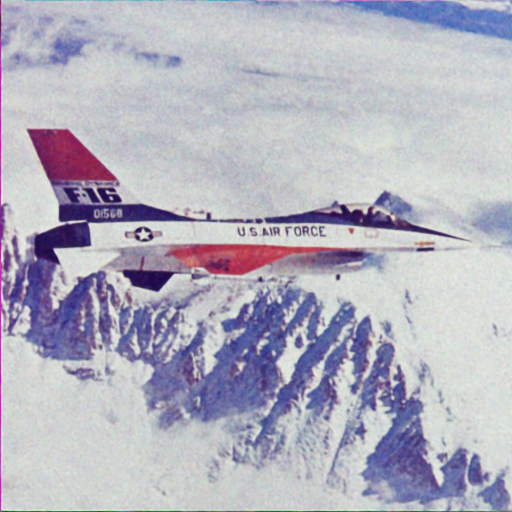

In [44]:
colorview(RGB, generated_image)